In [1]:
# data 07/11/2025
# Data Exploration and Cleaning
# Load the dataset into a Pandas DataFrame and display the first 5 rows.
# Check the shape, column names, and summary statistics of the dataset.
# Identify and handle missing values (fill or drop based on the data type).
# Convert Transaction_Date into datetime format and extract year, month, and day as new columns.
# Retrieve all transactions made in January 2025
# Find transactions where Amount > 700 and Transaction_Type is "Online".
# Select only Approved transactions from the dataset.
# Create a new column Discounted_Amount, assuming a 5% discount on all transactions above 500.

# data 06/11/2025
# Create Category_amount column with value - Low, Medium and High
# total amount per category
# Determine the number of declined transaction per payment_mode :
# Identify the top 5 most frequent merchants based on transactions count.
# Fraud Detection Indicators




In [2]:
# Date 05/11/2025

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# add new plot look theme
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # fixed figure size for all plots

In [3]:
# Load the dataset into a Pandas DataFrame and display the first 5 rows.
data = pd.read_csv('C:/Users/Admin/Downloads/credit_card_transactions_large.csv')
print(data.head())

   Transaction_ID  Customer_ID Transaction_Date Transaction_Type Merchant  \
0               1          103       2025-01-01              ATM  BestBuy   
1               2          271       2025-01-01           Online     eBay   
2               3          107       2025-01-01              ATM   Amazon   
3               4           72       2025-01-01              POS   Amazon   
4               5          189       2025-01-01              ATM   Amazon   

        Category  Amount Payment_Mode Transaction_Status       Location  
0         Dining  360.10  Credit Card            Pending  San Francisco  
1         Travel  357.02  Credit Card           Declined        Chicago  
2  Entertainment  829.41  Credit Card            Pending        Chicago  
3      Groceries  790.35  Credit Card            Pending    Los Angeles  
4       Clothing  311.26  Credit Card           Declined  San Francisco  


In [4]:
# Check the shape, column names, and summary statistics of the dataset.
print("Shape of the dataset:", data.shape)
print("Column names:", data.columns.tolist())
print("Summary statistics:\n", data.describe())

Shape of the dataset: (1200, 10)
Column names: ['Transaction_ID', 'Customer_ID', 'Transaction_Date', 'Transaction_Type', 'Merchant', 'Category', 'Amount', 'Payment_Mode', 'Transaction_Status', 'Location']
Summary statistics:
        Transaction_ID  Customer_ID       Amount
count     1200.000000  1200.000000  1200.000000
mean       600.500000   150.931667   494.489692
std        346.554469    86.144962   283.821837
min          1.000000     1.000000     5.030000
25%        300.750000    78.000000   243.565000
50%        600.500000   150.500000   495.090000
75%        900.250000   225.250000   734.625000
max       1200.000000   300.000000   999.560000


In [5]:
# Identify and handle missing values (fill or drop based on the data type).
# check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Transaction_ID        0
Customer_ID           0
Transaction_Date      0
Transaction_Type      0
Merchant              0
Category              0
Amount                0
Payment_Mode          0
Transaction_Status    0
Location              0
dtype: int64


In [6]:
# check data types
print("Data types of each column:\n", data.dtypes)

Data types of each column:
 Transaction_ID          int64
Customer_ID             int64
Transaction_Date       object
Transaction_Type       object
Merchant               object
Category               object
Amount                float64
Payment_Mode           object
Transaction_Status     object
Location               object
dtype: object


In [7]:
# change Transaction_Date to datetime
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])

In [8]:
# check data types
print("Data types of each column:\n", data.dtypes)

Data types of each column:
 Transaction_ID                 int64
Customer_ID                    int64
Transaction_Date      datetime64[ns]
Transaction_Type              object
Merchant                      object
Category                      object
Amount                       float64
Payment_Mode                  object
Transaction_Status            object
Location                      object
dtype: object


In [9]:
data.columns

Index(['Transaction_ID', 'Customer_ID', 'Transaction_Date', 'Transaction_Type',
       'Merchant', 'Category', 'Amount', 'Payment_Mode', 'Transaction_Status',
       'Location'],
      dtype='object')

In [10]:
# add new columns for year, month, day
data['Year'] = data['Transaction_Date'].dt.year
data['Month'] = data['Transaction_Date'].dt.month
data['Day'] = data['Transaction_Date'].dt.day

In [11]:
print(data[['Transaction_Date','Year','Month','Day']].head())

  Transaction_Date  Year  Month  Day
0       2025-01-01  2025      1    1
1       2025-01-01  2025      1    1
2       2025-01-01  2025      1    1
3       2025-01-01  2025      1    1
4       2025-01-01  2025      1    1


In [12]:
# Retrieve all transactions made in January 2025.
jan_2025 = data[(data['Year'] == 2025) & (data['Month'] == 1)]
jan_2025.head()
# export jan_2025 to csv
jan_2025.to_csv('january_2025_transactions.csv', index=False)

In [13]:
# Find transactions where Amount > 700 and Transaction_Type is "Online".
online_transactions = data[(data['Amount'] > 700) & (data['Transaction_Type'] == "Online")]

In [14]:
# Select only Approved transactions from the dataset.
approved_transactions = data[data['Transaction_Status'] == 'Approved']
# give me number of rows count where Status is Approved
approved_transactions = data[data['Transaction_Status'] == 'Approved']
print("Number of Approved transactions:", len(approved_transactions))

Number of Approved transactions: 399


In [15]:
# Create a new column Discounted_Amount, assuming a 5% discount on all transactions above 500.
data['Discounted_Amount'] = data['Amount']

mask = data['Amount'] > 500

data.loc[mask, 'Discounted_Amount'] = data.loc[mask, 'Amount'] * 0.95

print(data[['Amount', 'Discounted_Amount']].head())



   Amount  Discounted_Amount
0  360.10           360.1000
1  357.02           357.0200
2  829.41           787.9395
3  790.35           750.8325
4  311.26           311.2600


In [16]:
# DATE 06/11/2025

# Create Category_amount column with value - Low, Medium and High

# amount
# 1 low   (below - 100)
# 2 medium  (between 100 - 500)
# 3 high    (above - 500)

def amount_cat(x):
    if x < 100:
        return("Low")
    elif x <=500:
        return("Medium")
    else:
        return("High")


In [17]:
amount_cat(200)

'Medium'

In [18]:
data['amount_category'] = data['Amount'].apply(amount_cat)

In [19]:
print(data[['Amount','amount_category']])

      Amount amount_category
0     360.10          Medium
1     357.02          Medium
2     829.41            High
3     790.35            High
4     311.26          Medium
...      ...             ...
1195   75.80             Low
1196  576.00            High
1197  568.19            High
1198  878.64            High
1199  560.08            High

[1200 rows x 2 columns]


In [20]:
# total amount per category

Total_cat = data.groupby('Category',)['Amount'].sum()
print(Total_cat)

Category
Clothing         90207.10
Dining           85015.63
Electronics      76672.25
Entertainment    78467.94
Groceries        90815.72
Health           85100.25
Travel           87108.74
Name: Amount, dtype: float64


In [21]:
# Determine the number of declined transaction per payment_mode :

approved_transactions = data[data['Transaction_Status'] == 'Declined']

approved_transactions = data[data['Transaction_Status'] == 'Declined']
print("Number of Declined transactions:", len(approved_transactions))

Number of Declined transactions: 416


In [22]:

'''
Total_conu = data.groupby('Transaction_Status',)['Payment_mode'].sum()
print(Total_count)
'''
Total_count = data.groupby('Transaction_Status',)['Payment_Mode'].count()
print(Total_count)


Transaction_Status
Approved    399
Declined    416
Pending     385
Name: Payment_Mode, dtype: int64


In [23]:

Total_count = data.groupby('Transaction_Status',)['Payment_Mode'].count()
print(Total_count)
if Total_count == 'Approved':
    print('Approved')

Transaction_Status
Approved    399
Declined    416
Pending     385
Name: Payment_Mode, dtype: int64


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [25]:
dec = data[data['Transaction_Status'] == 'Declined']
dec_by_mode = dec['Payment_Mode'].value_counts()
print(dec_by_mode)

Payment_Mode
Debit Card     216
Credit Card    200
Name: count, dtype: int64


In [26]:
print(data.head())

   Transaction_ID  Customer_ID Transaction_Date Transaction_Type Merchant  \
0               1          103       2025-01-01              ATM  BestBuy   
1               2          271       2025-01-01           Online     eBay   
2               3          107       2025-01-01              ATM   Amazon   
3               4           72       2025-01-01              POS   Amazon   
4               5          189       2025-01-01              ATM   Amazon   

        Category  Amount Payment_Mode Transaction_Status       Location  Year  \
0         Dining  360.10  Credit Card            Pending  San Francisco  2025   
1         Travel  357.02  Credit Card           Declined        Chicago  2025   
2  Entertainment  829.41  Credit Card            Pending        Chicago  2025   
3      Groceries  790.35  Credit Card            Pending    Los Angeles  2025   
4       Clothing  311.26  Credit Card           Declined  San Francisco  2025   

   Month  Day  Discounted_Amount amount_category  

In [27]:
# Identify the top 5 most frequent merchants based on transactions count.

top_5 = data['Merchant'].value_counts()
print(top_5.head())


Merchant
BestBuy    192
Target     179
eBay       177
Expedia    173
Amazon     171
Name: count, dtype: int64


In [28]:
# check customer info dataset

# Fraud Detection Indicators
# find customer who made more than 10 transaction in a single day (potential fraud)

customer_info = pd.read_csv('C:/Users/Admin/Downloads/customer_info.csv')
print(customer_info.head())

# step 1 creat a new column with date only from Transaction_date
data['Date'] = data['Transaction_Date'].dt.date
print(data['Date'].head())

   Customer_ID  Age  Gender Account_Status
0            1   66    Male       Inactive
1            2   53  Female      Suspended
2            3   40  Female      Suspended
3            4   49   Other       Inactive
4            5   27   Other      Suspended
0    2025-01-01
1    2025-01-01
2    2025-01-01
3    2025-01-01
4    2025-01-01
Name: Date, dtype: object


In [29]:
# step 02 group by customer_id and date and count number of transaction 
daily = data.groupby(['Customer_ID','Date']).size()
print(daily.head())

Customer_ID  Date      
1            2025-01-16    1
             2025-01-23    1
             2025-01-24    1
             2025-01-27    1
             2025-01-30    1
dtype: int64


In [30]:
# step 03 filter customer with more than 10 transaction in a day 
month_per_day = daily[daily > 2].reset_index()
print(month_per_day)

   Customer_ID        Date  0
0          104  2025-02-06  3
1          113  2025-01-07  3
2          157  2025-02-07  4
3          173  2025-01-23  3


In [47]:
# Find transactions where Amount > 800 and Transaction_Type is Online (flag as high-risk)
data["High_Risk"] = (data['Amount'] > 800) & (data['Transaction_Type'] == 'Online')
print(data[['Amount','Transaction_Type','High_Risk']].head())

   Amount Transaction_Type  High_Risk
0  360.10              ATM      False
1  357.02           Online      False
2  829.41              ATM      False
3  790.35              POS      False
4  311.26              ATM      False


In [48]:
# count 
print("Number of High Risk transactions:", data['High_Risk'].sum())

Number of High Risk transactions: 78


In [49]:
# date 07/11/2025

# Data Merging and Joining
# Suppose you have another dataset (customer_info.csv) containing Customer_ID, Age, Gender, and Account_Status.
# Merge it with credit_card_transactions.csv using an appropriate join operation.
# Find the average transaction amount per Age group.

In [50]:
# Data Merging and Joining

data_full = pd.merge(data, customer_info, on = 'Customer_ID', how = 'left')
print(data_full)

      Transaction_ID  Customer_ID Transaction_Date Transaction_Type Merchant  \
0                  1          103       2025-01-01              ATM  BestBuy   
1                  2          271       2025-01-01           Online     eBay   
2                  3          107       2025-01-01              ATM   Amazon   
3                  4           72       2025-01-01              POS   Amazon   
4                  5          189       2025-01-01              ATM   Amazon   
...              ...          ...              ...              ...      ...   
1195            1196          282       2025-02-19              ATM   Costco   
1196            1197           86       2025-02-19              POS   Costco   
1197            1198          250       2025-02-19              ATM   Costco   
1198            1199          270       2025-02-19           Online  BestBuy   
1199            1200          117       2025-02-19              POS   Costco   

           Category  Amount Payment_Mod

In [51]:
# Exporting Results
# Save the cleaned and processed dataset to a new CSV file.
data_full.to_csv('full_data.csv', index=False)

In [52]:
# check the null value

data_full.isnull().sum()

Transaction_ID        0
Customer_ID           0
Transaction_Date      0
Transaction_Type      0
Merchant              0
Category              0
Amount                0
Payment_Mode          0
Transaction_Status    0
Location              0
Year                  0
Month                 0
Day                   0
Discounted_Amount     0
amount_category       0
Date                  0
High_Risk             0
Age                   0
Gender                0
Account_Status        0
dtype: int64

In [53]:
# # Find the average transaction amount per Age group.

bins = [18, 35, 45, 60, 120]
labels = ["18-30","31-45","46-60","60+"]
data_full['Age_Group'] = pd.cut(data_full["Age"],
                                bins=bins,
                                labels=labels,
                                include_lowest=True)

avg_per_age = data_full.groupby('Age_Group')['Amount'].mean().round(2)
print("Average transaction amount per Age group:\n", avg_per_age)

Average transaction amount per Age group:
 Age_Group
18-30    494.21
31-45    513.58
46-60    486.42
60+      485.45
Name: Amount, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_5100\4058721187.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_per_age = data_full.groupby('Age_Group')['Amount'].mean().round(2)


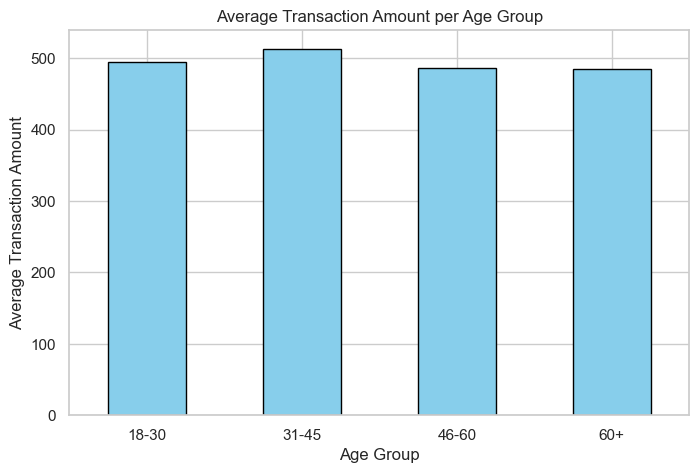

In [54]:
plt.figure(figsize=(8,5))
avg_per_age.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Transaction Amount per Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Transaction Amount")
plt.xticks(rotation=360)
plt.show()

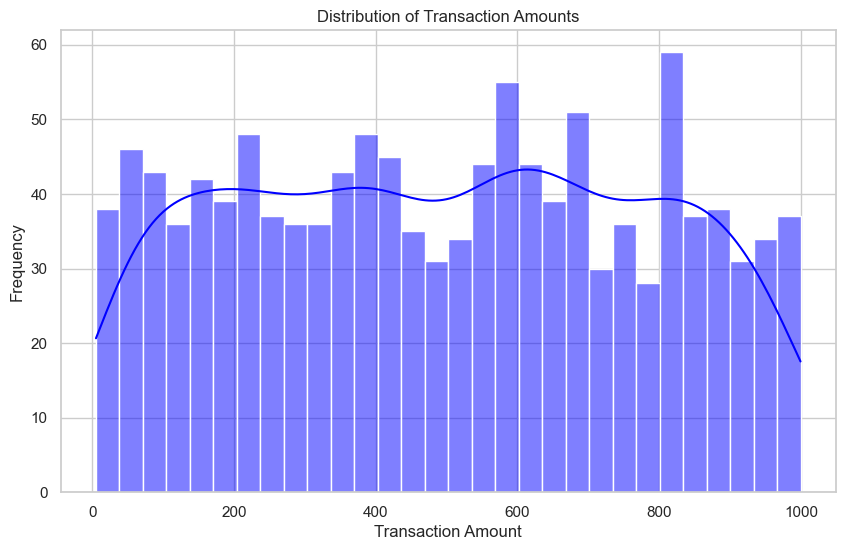

In [55]:
sns.histplot(data_full['Amount'], bins=30, kde=True, color='blue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

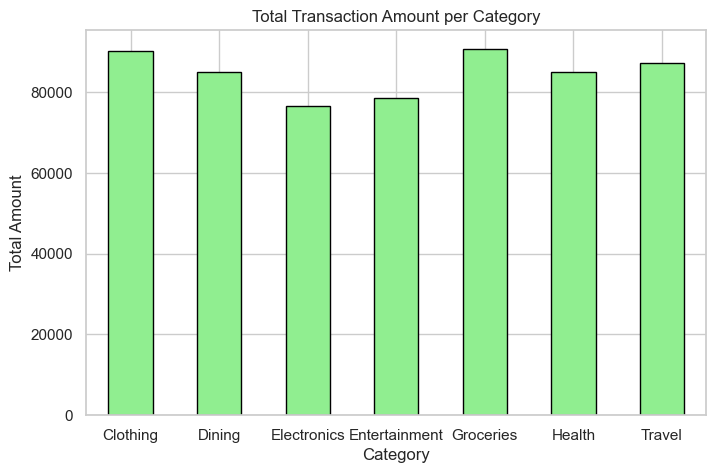

In [56]:
# bar chart
total_cat = data_full.groupby('Category')['Amount'].sum()
plt.figure(figsize=(8,5))
total_cat.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Total Transaction Amount per Category")
plt.xlabel("Category")
plt.ylabel("Total Amount")
plt.xticks(rotation=360)
plt.show()

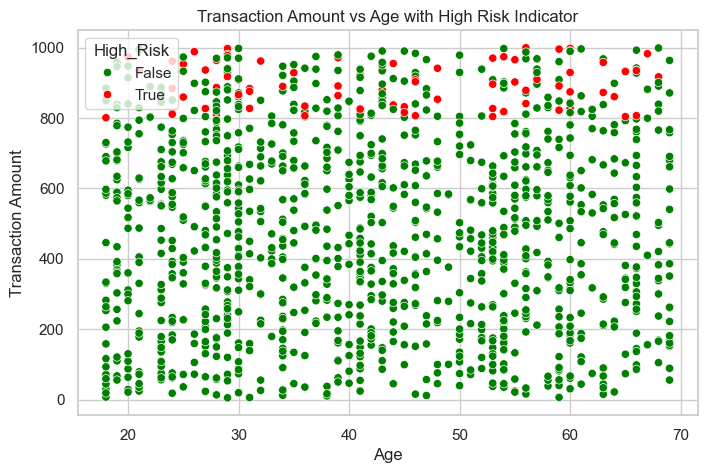

In [60]:
# high risk by age group scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=data_full, x='Age', y='Amount', hue='High_Risk', palette={True: 'red', False: 'green'})
plt.title("Transaction Amount vs Age with High Risk Indicator")
plt.xlabel("Age")
plt.ylabel("Transaction Amount")
plt.show()
